In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Load the dataset
data = pd.read_csv(r'E:\Campus\CodeAlpha\Sales Prediction\Advertising.csv')
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
# Remove the unnecessary column 'Unnamed: 0'
data.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
# Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nSummary statistics:")
print(data.describe())

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.

In [22]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [23]:
# Data Cleaning: Dropping rows with missing values
data = data.dropna()

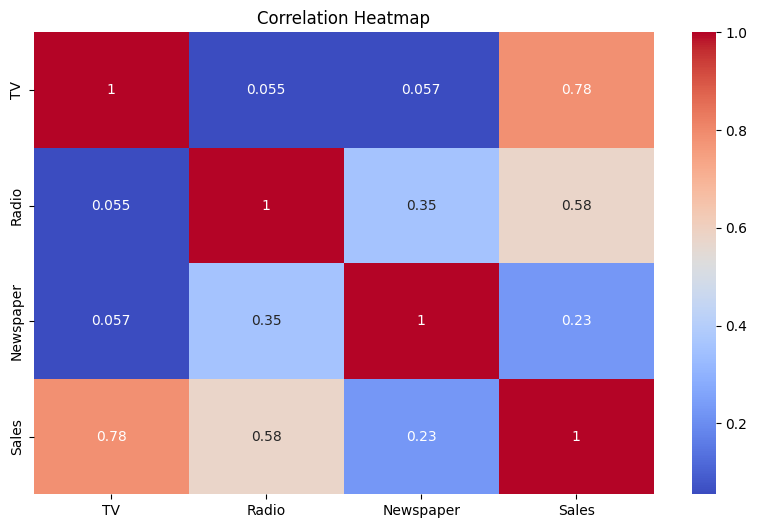

In [24]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Feature Selection and Target Variable
X = data.drop(columns=['Sales'])
y = data['Sales']

In [26]:
# Encoding categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Linear Regression Model
lr_model = LinearRegression()

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)

In [29]:
# Combined Model using Voting Regressor
combined_model = VotingRegressor(estimators=[('Linear Regression', lr_model), ('Random Forest', rf_model)])
combined_model.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest',
                             RandomForestRegressor(random_state=42))])

In [30]:
# Predictions and Evaluation
y_pred_combined = combined_model.predict(X_test)

print("Combined Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_combined):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_combined):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_combined)):.2f}")


Combined Model Performance:
Mean Absolute Error: 0.83
Mean Squared Error: 1.01
Root Mean Squared Error: 1.00


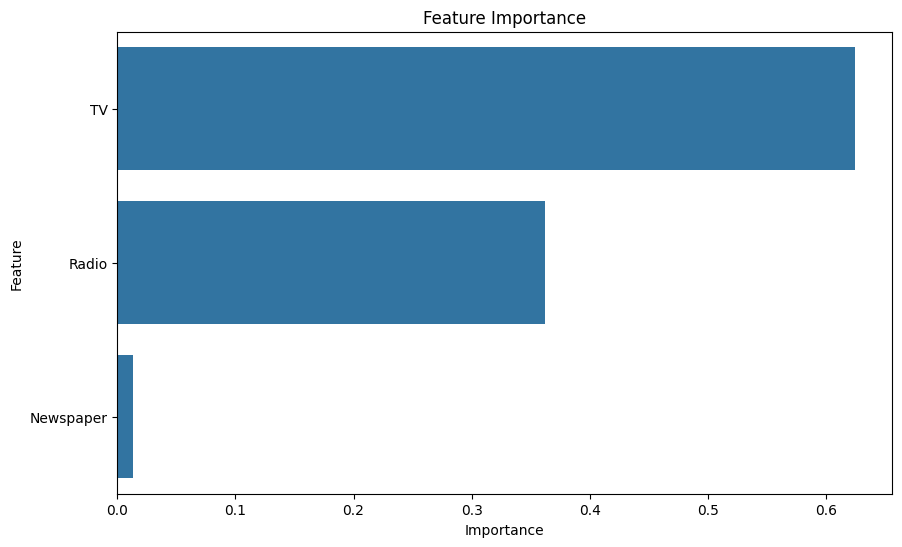

In [31]:
# Feature Importance (for Random Forest)
rf_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
